In [1]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import os
os.environ['PROJ_LIB']=r'/home/weikangqian/.conda/envs/AIRS/share/proj' # path to the proj4 folder.
os.environ['GDAL_DATA']=r'/home/weikangqian/.conda/envs/AIRS/share' # path to the proj4 folder.

# Direct access
import s3fs

# datetime
import datetime as dt

# api to read files
import xarray as xr
import h5py
import gzip
import pyart

# data process
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
url_parents = 's3://noaa-nexrad-level2/' # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename
yyyy = '2015'
mm = '05'
dd = '16'
Radar_id = 'KTLX'
url_radar_search = url_parents + yyyy + '/' + mm + '/' + dd + '/' + Radar_id + '/' # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename

In [3]:
s3 = s3fs.S3FileSystem(anon=True) # connect to s3

In [4]:
url_radar_date = s3.ls(url_radar_search) # list all the files in the folder
url_radar_date[170]  # time: 16:43:47

'noaa-nexrad-level2/2015/05/16/KTLX/KTLX20150516_164347_V06.gz'

In [5]:
aws_nexrad_level2_file = ('s3://'+url_radar_date[170]) # the format of the full url is s3://bucket/yyyy/mm/dd/Radar_id/filename
radar = pyart.io.read_nexrad_archive(aws_nexrad_level2_file) # read the file
list(radar.fields) # list all the fields/variables in the file

['differential_reflectivity',
 'velocity',
 'reflectivity',
 'spectrum_width',
 'cross_correlation_ratio',
 'differential_phase']

In [6]:
print(radar.__dict__.keys()) # list all the attributes in radar dataset

dict_keys(['time', 'range', 'fields', 'metadata', 'scan_type', 'latitude', 'longitude', 'altitude', 'altitude_agl', 'sweep_number', 'sweep_mode', 'fixed_angle', 'sweep_start_ray_index', 'sweep_end_ray_index', 'target_scan_rate', 'rays_are_indexed', 'ray_angle_res', 'azimuth', 'elevation', 'scan_rate', 'antenna_transition', 'rotation', 'tilt', 'roll', 'drift', 'heading', 'pitch', 'georefs_applied', 'instrument_parameters', 'radar_calibration', 'ngates', 'nrays', 'nsweeps', 'projection', 'rays_per_sweep', 'gate_x', 'gate_y', 'gate_z', 'gate_longitude', 'gate_latitude', 'gate_altitude'])


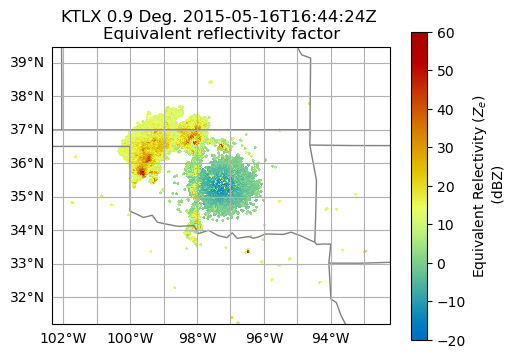

In [7]:
fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "reflectivity",
    sweep=2,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

# Read data with pyart
## radar.fields
radar.fields['data']

['reflectivity', 'spectrum_width', 'velocity', 'cross_correlation_ratio', 'differential_reflectivity', 'differential_phase']
## radar attributes
radar.__dict__.keys()
such as longitude, latitude

['time', 'range', 'fields', 'metadata', 'scan_type', 'latitude', 'longitude', 'altitude', 'altitude_agl', 'sweep_number', 'sweep_mode', 'fixed_angle', 'sweep_start_ray_index', 'sweep_end_ray_index', 'target_scan_rate', 'rays_are_indexed', 'ray_angle_res', 'azimuth', 'elevation', 'scan_rate', 'antenna_transition', 'rotation', 'tilt', 'roll', 'drift', 'heading', 'pitch', 'georefs_applied', 'instrument_parameters', 'radar_calibration', 'ngates', 'nrays', 'nsweeps', 'projection', 'rays_per_sweep', 'gate_x', 'gate_y', 'gate_z', 'gate_longitude', 'gate_latitude', 'gate_altitude']

## radar.metadata
radar.metadata.keys()

['Conventions', 'version', 'title', 'institution', 'references', 'source', 'history', 'comment', 'instrument_name', 'original_container', 'vcp_pattern']

In [8]:
print(radar.__dict__.keys()) # list all the attributes in radar dataset

dict_keys(['time', 'range', 'fields', 'metadata', 'scan_type', 'latitude', 'longitude', 'altitude', 'altitude_agl', 'sweep_number', 'sweep_mode', 'fixed_angle', 'sweep_start_ray_index', 'sweep_end_ray_index', 'target_scan_rate', 'rays_are_indexed', 'ray_angle_res', 'azimuth', 'elevation', 'scan_rate', 'antenna_transition', 'rotation', 'tilt', 'roll', 'drift', 'heading', 'pitch', 'georefs_applied', 'instrument_parameters', 'radar_calibration', 'ngates', 'nrays', 'nsweeps', 'projection', 'rays_per_sweep', 'gate_x', 'gate_y', 'gate_z', 'gate_longitude', 'gate_latitude', 'gate_altitude'])


In [9]:
# read attributes
lon_data = radar.longitude['data']
lat_data = radar.latitude['data']
ele_data = radar.elevation['data']
azimuth_data = radar.azimuth['data']
scan_rate_data = radar.scan_rate
nsweep_data = radar.nsweeps

In [10]:
# read field data
ref = radar.fields['reflectivity']
ref_data = ref['data'].data

In [13]:
print(scan_rate_data)

None


In [14]:
print(ref_data)

[[-22.  -14.5  -7.  ... -33.  -33.  -33. ]
 [-23.5  -9.5 -16.5 ... -33.  -33.  -33. ]
 [-23.  -12.  -25.5 ... -33.  -33.  -33. ]
 ...
 [-10.   -8.  -17.5 ... -32.5 -32.5 -32.5]
 [-11.  -13.5 -12.5 ... -32.5 -32.5 -32.5]
 [-16.  -12.   -9.5 ... -32.5 -32.5 -32.5]]


In [15]:
print(ele_data)

array([0.70861816, 0.6729126 , 0.6866455 , ..., 7.998047  , 7.998047  ,
       7.998047  ], dtype=float32)

In [16]:
nsweep_data

15

In [12]:
print(radar.scan_type)

ppi
